In [2]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [3]:
file_path = "../results/responder/insertion_deletion_ensemble.pkl"

results = pkl.load(open(file_path,'rb'))

In [3]:
def normalize_data(data):

    normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))

    return normalized_data


explainers = [
    "integrated_gradients", 
    "shapley_value_sampling", 
    "naive_shap"
]

plt.figure(figsize=(20,6))

for exp_index, exp in enumerate(explainers):
    
    insertion_results = normalize_data(results[exp_index][2])
    deletion_results = normalize_data(results[exp_index][3])
    
    features_num = insertion_results.shape[0]
    plt.subplot(1,2,1)

    plt.plot([i for i in range(features_num)], insertion_results,'-o', markersize=4,label=exp)
    plt.title("insertion")
    
    plt.subplot(1,2,2)
    plt.plot([i for i in range(features_num)], deletion_results,'-o',markersize=4, label= exp)
    plt.title("deletion")
    
plt.legend(bbox_to_anchor=(1.5, 1), prop={'size': 15 })

NameError: name 'results' is not defined

<Figure size 1440x432 with 0 Axes>

In [ ]:
explainers = [
    "integrated_gradients", 
    "shapley_value_sampling",
    "naive_shap"
]

selection_types = [ 
    "if_pehe",
    "pseudo_outcome_dr", 
    "pseudo_outcome_r"
]

# Initialize dictionaries to store all results
insertion_results_all = {exp: {sel: [] for sel in selection_types} for exp in explainers}
deletion_results_all = {exp: {sel: [] for sel in selection_types} for exp in explainers}

# Loop over the different files
for file_num in range(1):  # assuming there are 5 files, from 0 to 4
    
    if file_num not in [1]:
        
        for selection_type in selection_types:
            file_path = f"../results/ist3/insertion_deletion_ensemble.pkl"
            results = pkl.load(open(file_path,'rb'))

            for exp_index, exp in enumerate(explainers):
                insertion_results_all[exp][selection_type].append((results[exp_index][2][selection_type]))
                deletion_results_all[exp][selection_type].append((results[exp_index][3][selection_type]))

fig, axs = plt.subplots(len(selection_types), 2, figsize=(10, 3*len(selection_types)))

# Calculate and plot mean results

for i, selection_type in enumerate(selection_types):
    for exp in explainers:
        
        if exp == "shapley_value_sampling":
            label = "shapley - 0"
        elif exp == "naive_shap":
            label = "shapley - marginal"
        else:
            label = exp
        
        insertion_results_mean = np.mean(insertion_results_all[exp][selection_type], axis=0)
        insertion_results_std = np.std(insertion_results_all[exp][selection_type], axis=0)

        deletion_results_mean = np.mean(deletion_results_all[exp][selection_type], axis=0)
        deletion_results_std = np.std(deletion_results_all[exp][selection_type], axis=0)

        features_num = len(insertion_results_mean)

        axs[i, 0].plot([j for j in range(features_num)],
                 insertion_results_mean,
                 '-o',
                 markersize=3,
                 label=f'{label}')

        axs[i, 0].set_title(f"Mean insertion - {selection_type}")
        axs[i, 0].set_xlabel('Feature')
        axs[i, 0].set_ylabel('PEHE')

        axs[i, 1].plot([j for j in range(features_num)],
                 deletion_results_mean,
                 '-o',
                 markersize=3,
                 label=f'{label}')
        
        axs[i, 1].set_title(f"Mean deletion - {selection_type}")
        axs[i, 1].set_xlabel('Feature')
        axs[i, 1].set_ylabel('PEHE')
        
        axs[i, 0].legend(loc='upper right')
        axs[i, 1].legend(loc='lower right')
        
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../results/ist3/insertion_deletion_TARnet.pkl'

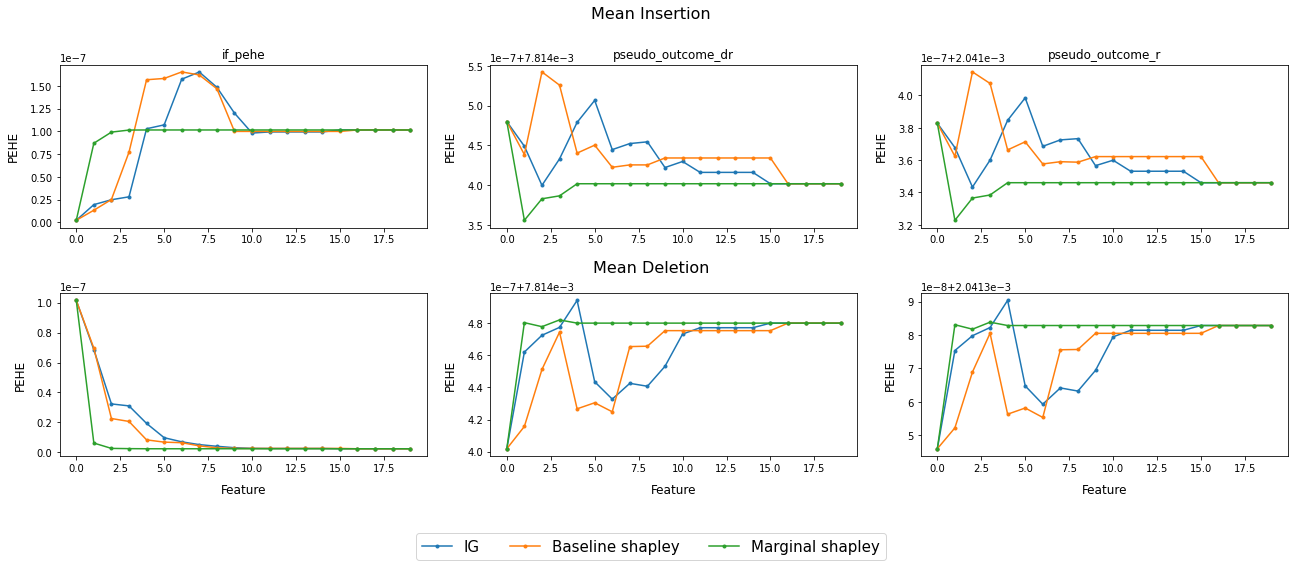

In [42]:
explainers = [
    "integrated_gradients", 
    "shapley_value_sampling",
    "naive_shap"
]

selection_types = [ 
    "if_pehe",
    "pseudo_outcome_dr", 
    "pseudo_outcome_r"
]

# Initialize dictionaries to store all results
insertion_results_all = {exp: {sel: [] for sel in selection_types} for exp in explainers}
deletion_results_all = {exp: {sel: [] for sel in selection_types} for exp in explainers}

# Loop over the different files

seeds = [0]

for file_num in range(5):  # assuming there are 5 files, from 0 to 4
    
    if file_num not in [1]:
        
        for selection_type in selection_types:
            file_path = f"../results/ist3/insertion_deletion_TARNet_{file_num}.pkl"
            results = pkl.load(open(file_path,'rb'))

            for exp_index, exp in enumerate(explainers):
                insertion_results_all[exp][selection_type].append((results[exp_index][2][selection_type]))
                deletion_results_all[exp][selection_type].append((results[exp_index][3][selection_type]))


# Create a grid for subplots
gs = gridspec.GridSpec(2, len(selection_types))

# Create figure
fig = plt.figure(figsize=(6 * len(selection_types), 8))

# To keep track of labels and lines for the legend
handles, labels = [], []

# Calculate and plot mean results
for i, selection_type in enumerate(selection_types):
    for exp in explainers:
        if exp == "shapley_value_sampling":
            label = "Baseline shapley"
        elif exp == "naive_shap":
            label = "Marginal shapley"
        elif exp == "integrated_gradients":
            label = "IG"
        else:
            label = exp
        
        insertion_results_mean = np.mean(insertion_results_all[exp][selection_type], axis=0)
        deletion_results_mean = np.mean(deletion_results_all[exp][selection_type], axis=0)
        features_num = len(insertion_results_mean)

        # Insertion subplot
        ax1 = plt.subplot(gs[0, i])
        ax1.set_title(f"{selection_type}")
        ax1.set_ylabel('PEHE', fontsize=12, labelpad=10)
        
        # Plot and store the line and label for legend
        line, = ax1.plot(range(features_num), insertion_results_mean, '-o', markersize=3)
        
        # Deletion subplot
        ax2 = plt.subplot(gs[1, i])
        ax2.set_ylabel('PEHE', fontsize=12, labelpad=10)
        ax2.plot(range(features_num), deletion_results_mean, '-o', markersize=3)
        
        # Add the line handle and label only if it doesn't exist
        if label not in labels:
            handles.append(line)
            labels.append(label)

# Set the x-label for only the bottom subplots
for i in range(len(selection_types)):
    ax = plt.subplot(gs[1, i])
    ax.set_xlabel('Feature', fontsize=12, labelpad=10)

# Set main titles for each row, outside of loops, and adjust positions
fig.text(0.5, 0.96, "Mean Insertion", ha='center', fontsize=16)
fig.text(0.5, 0.52, "Mean Deletion", ha='center', fontsize=16)

# Add a single legend for the entire figure with larger font size
# Move legend below the second row
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.08), fontsize=15, ncol=len(labels))

# Adjust layout and add more space for the main titles
plt.tight_layout()
plt.subplots_adjust(top=0.88, hspace=0.4, bottom=0.2)
plt.show()


# # Function to calculate the percentage contribution of cumulative PEHE up to nth feature relative to the total PEHE at final feature
# def calc_cumulative_contribution(n, data):
#     if n >= len(data):
#         raise ValueError(f"Feature index {n} is out of bounds for data of length {len(data)}")
#     percentage_contribution = (data[-1] - data[n] / data[-1]) * 100
#     return percentage_contribution

# # Let's say you want the cumulative contribution of PEHE when up to the 5th feature is added
# n = 4

# # Loop through each explainer and selection type
# for exp in explainers:
#     for selection_type in selection_types:
#         # Get the cumulative PEHE for each feature
#         pehe_values = np.mean(insertion_results_all[exp][selection_type], axis=0)
#         percentage_contribution = calc_cumulative_contribution(n, pehe_values)
        
#         # Print the percentage contribution of PEHE up to nth feature
#         print(f"For {exp} with {selection_type} selection:")
#         print(f"Percentage contribution of PEHE up to {n+1}th feature: {percentage_contribution}%")


In [35]:
def calculate_stability_metrics(pehe_values, stabilization_threshold=0.01, stabilization_length=5):
    # Calculate PEHE changes (as percentages)
    pehe_changes = np.diff(pehe_values) / pehe_values[:-1]
    
    # Find the point of stabilization
    below_threshold = np.where(np.abs(pehe_changes) < stabilization_threshold)[0]
    if len(below_threshold) < stabilization_length:
        point_of_stabilization = len(pehe_values)
    else:
        for i in range(len(below_threshold) - stabilization_length + 1):
            if np.all(np.diff(below_threshold[i:i+stabilization_length]) == 1):
                point_of_stabilization = below_threshold[i]
                break
        else:
            point_of_stabilization = len(pehe_values)

    # Calculate overall variance
    overall_variance = np.var(pehe_values)

    return point_of_stabilization, overall_variance

# Calculate the stability metrics for each explainer and selection type
for exp in explainers:
    for selection_type in selection_types:
        # Compute the average PEHE for each feature
        pehe_values = np.mean(insertion_results_all[exp][selection_type], axis=0)
        point_of_stabilization, overall_variance = calculate_stability_metrics(pehe_values)
        
        # Print the stability metrics
        print(f"For {exp} with {selection_type} selection:")
        print(f"Point of Stabilization: {point_of_stabilization}")
        print(f"Overall Variance: {overall_variance}")


For integrated_gradients with if_pehe selection:
Point of Stabilization: 5
Overall Variance: 10.54985094711115
For integrated_gradients with pseudo_outcome_dr selection:
Point of Stabilization: 5
Overall Variance: 1.1906826829765266e-05
For integrated_gradients with pseudo_outcome_r selection:
Point of Stabilization: 5
Overall Variance: 2.903097725888402e-06
For shapley_value_sampling with if_pehe selection:
Point of Stabilization: 12
Overall Variance: 12.507949053620258
For shapley_value_sampling with pseudo_outcome_dr selection:
Point of Stabilization: 9
Overall Variance: 4.888604638175816e-05
For shapley_value_sampling with pseudo_outcome_r selection:
Point of Stabilization: 9
Overall Variance: 1.2143467221300669e-05
For naive_shap with if_pehe selection:
Point of Stabilization: 3
Overall Variance: 10.425443321253603
For naive_shap with pseudo_outcome_dr selection:
Point of Stabilization: 2
Overall Variance: 1.0517697549542988e-05
For naive_shap with pseudo_outcome_r selection:
Poin